Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.


Predicting the stack demand for centers for the next 10 weeks.

In [4]:
#Dataset available here # https://github.com/aditi310896/Demand-Forecasting
import pandas as pd
import numpy as np
#from google.colab import files


In [5]:
#traindata =  files.upload()
#traindata

Data Exploration 
1.   Variable Identification
2.   Univariate Analysis
3.   Bi-variate Analysis
4.   Missing values treatment
5.   Outlier treatment
6.  Variable transformation
7.  Variable creation


In [6]:
#Importing the first file
train = pd.read_csv('trainn.csv')
meal = pd.read_csv('meal_info.csv')
center = pd.read_csv('fulfilment_center_info.csv')

In [7]:
# Preview 
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0


In [8]:
meal.head()
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
# Merge the datasets for easy analysis
merge0 = pd.merge(train, center, on='center_id', how='inner')
merge0.head()

#merge1 = pd.merge(train, center, on='center_id', how='inner')
#merge1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0


In [10]:
# Mearging the thrird file
merge1 = pd.merge(merge0, meal, on='meal_id')
merge1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163.0,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215.0,647,56,TYPE_C,2.0,Beverages,Thai


In [11]:
# Write the combined data to csv for later use
merge1.to_csv('finaldata.csv', header = False)

From the above cell, the dataset is completly merged as a single file and we can proceed for further analysis.

In [12]:
# Variable Identification and data understanding
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201810 entries, 0 to 201809
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     201810 non-null  int64  
 1   week                   201810 non-null  int64  
 2   center_id              201810 non-null  int64  
 3   meal_id                201810 non-null  int64  
 4   checkout_price         201810 non-null  float64
 5   base_price             201810 non-null  float64
 6   emailer_for_promotion  201810 non-null  int64  
 7   homepage_featured      201810 non-null  int64  
 8   num_orders             201809 non-null  float64
 9   city_code              201810 non-null  int64  
 10  region_code            201810 non-null  int64  
 11  center_type            201810 non-null  object 
 12  op_area                201810 non-null  float64
 13  category               201810 non-null  object 
 14  cuisine                201810 non-nu

The above output shows presence on object datatypes and intergers. 

The dataset also is clean without null values

In [13]:
# Dealing with the NaN in numerical columns with frequent values
#train_df.fillna(train_df.select_dtypes(include='number').mean().iloc[0], inplace=True)
#df1.fillna(df1.select_dtypes(include='object').mode().iloc[0], inplace=True)

# Option two drop the row with null value
#train_df = train_df.dropna(axis=0)
#train_df.isnull().sum()

In [14]:
merge1.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,2.018100e+05,201810.000000,201810.000000,201810.000000,201810.000000,201810.000000,201810.000000,201810.000000,201809.000000,201810.000000,201810.000000,201810.000000
mean,1.249728e+06,34.625653,82.296779,2014.322333,328.168553,349.470936,0.080734,0.111392,266.888523,601.490516,56.548853,4.080658
std,1.442537e+05,19.265517,45.987174,545.978209,150.625350,155.691985,0.272427,0.314618,413.092221,66.276236,17.605614,1.090144
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.124749e+06,18.000000,43.000000,1543.000000,231.830000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.249690e+06,35.000000,76.000000,1971.000000,291.030000,309.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.374468e+06,51.000000,110.000000,2539.000000,436.530000,454.930000,0.000000,0.000000,325.000000,651.000000,77.000000,4.500000
max,1.499999e+06,67.000000,186.000000,2956.000000,728.530000,728.530000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


In [15]:
# Understanding the correlation oft he varibles 
merge1.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,-0.002492,0.006317,-0.002728,0.002471,0.003425,0.003864,0.000199,0.002348,0.000144,-0.000389,-0.000651
week,-0.002492,1.000000,-0.003303,0.031965,0.006823,0.003877,-0.000007,-0.024527,-0.003054,-0.000768,0.007576,-0.001903
center_id,0.006317,-0.003303,1.000000,0.012913,0.004965,0.003918,0.017317,-0.010493,-0.043709,0.063101,0.000237,-0.115099
meal_id,-0.002728,0.031965,0.012913,1.000000,-0.000361,-0.009625,0.009804,0.013855,0.005901,-0.002794,0.000403,0.000957
checkout_price,0.002471,0.006823,0.004965,-0.000361,1.000000,0.954122,0.002782,-0.057903,-0.288283,-0.005348,-0.005199,0.015077
base_price,0.003425,0.003877,0.003918,-0.009625,0.954122,1.000000,0.155938,0.050776,-0.227524,-0.002360,-0.003883,0.013031
emailer_for_promotion,0.003864,-0.000007,0.017317,0.009804,0.002782,0.155938,1.000000,0.344224,0.264765,-0.005747,-0.005417,-0.018980
homepage_featured,0.000199,-0.024527,-0.010493,0.013855,-0.057903,0.050776,0.344224,1.000000,0.288666,0.010800,0.006930,0.041007
num_orders,0.002348,-0.003054,-0.043709,0.005901,-0.288283,-0.227524,0.264765,0.288666,1.000000,0.036456,0.026219,0.169525
city_code,0.000144,-0.000768,0.063101,-0.002794,-0.005348,-0.002360,-0.005747,0.010800,0.036456,1.000000,0.044844,0.131135


From the above output we can see a strong corelation among operation area, region, citycode with the number of orders. 

Univariate Analysis

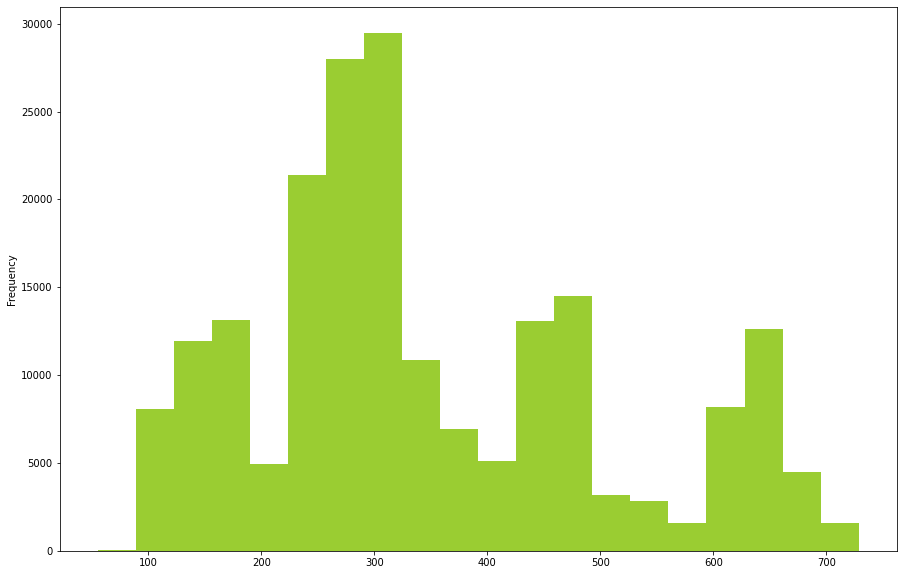

In [16]:
# Lets explore the distribution of base_price
merge1 ['base_price'].plot(kind='hist', bins=20, figsize=(15,10), facecolor = 'yellowgreen')


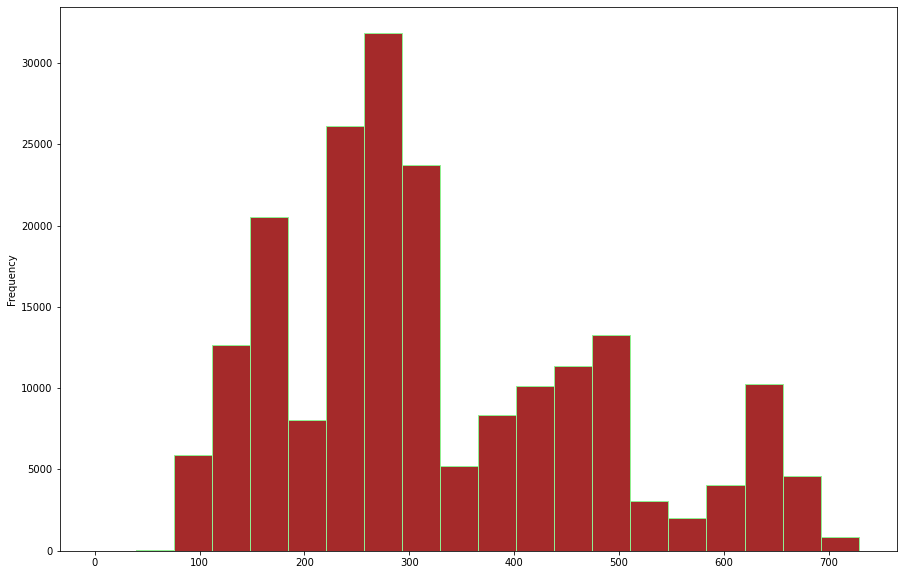

In [17]:
# Lets explore the distribution of checkout_price
import plotly.express as px
merge1 ['checkout_price'].plot(kind='hist', bins=20, figsize=(15,10), facecolor = 'brown', edgecolor='lightgreen')

Using matplotlib backend: agg


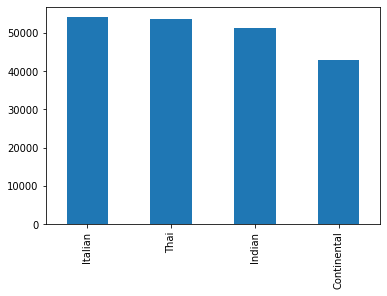

In [18]:
# How is cuisine distributed
import matplotlib.pyplot as plt
%matplotlib
merge1.cuisine.value_counts().plot(kind='bar')
plt.show()

In [19]:
#How were the orders varying accros the weeks
week_orders = merge1.groupby(['week'])[['num_orders']].sum() #, ascending=False()
week_orders


,num_orders
week,
1,792261.0
2,787084.0
3,695262.0
4,743529.0
5,1198675.0
...,...
63,812075.0
64,784508.0
65,844869.0


In [20]:
# What is the averange distribution of weekly order?

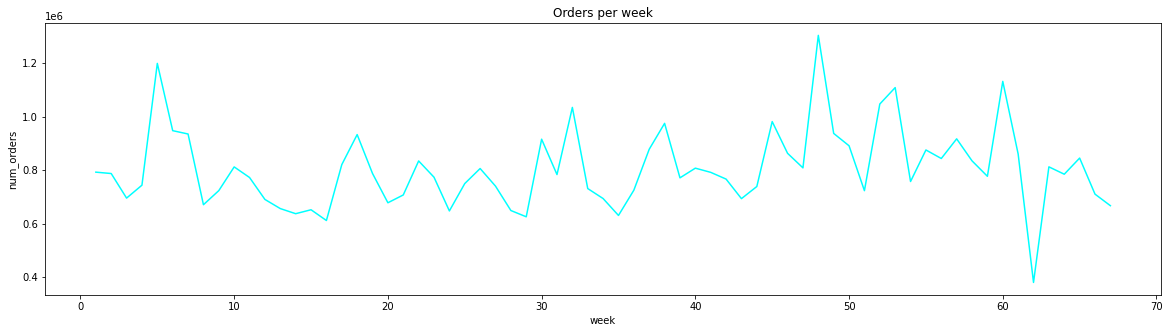

In [22]:
# Let's plot the trend of orders accros the weeks
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(x=week_orders.index, y =week_orders['num_orders'], color='cyan')
plt.title('Orders per week')
plt.show()

How are the centers buying our orders?

In [23]:
center = merge1.groupby(['center_id'])[['num_orders']].sum()
center

,num_orders
center_id,
10,1489316.0
11,1192186.0
13,1900373.0
14,554001.0
17,594762.0
...,...
161,380197.0
162,300984.0
174,1281025.0


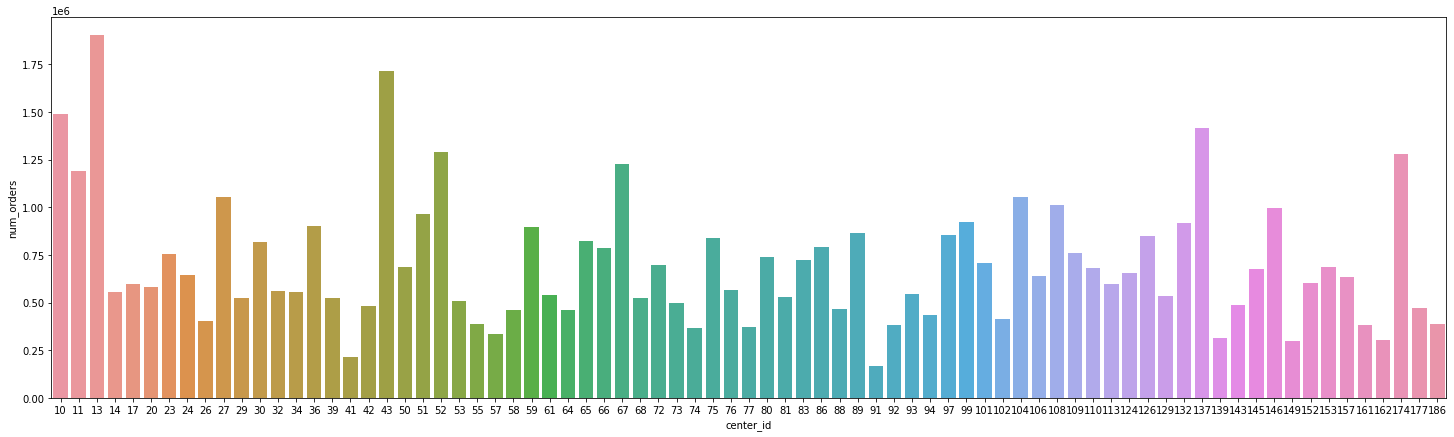

In [24]:
# Let's plot the centers verses the orders purchase
plt.figure(figsize=(25,7))
sns.barplot(x=center.index, y=center['num_orders'])
plt.show()

From the above plot we can see that center number 10,13,43, 52, 11, 137 are best customers, appropriate business strategies can be employed to examine how to boost sales in other centers.

In [25]:
# Which meal has many orders?
meal = merge1.groupby(['meal_id'])[['num_orders']].sum()
meal

,num_orders
meal_id,
1062,2257299.0
1109,2922682.0
1198,487911.0
1207,904903.0
1216,223337.0
1230,924101.0
1247,115251.0
1248,419507.0
1311,731823.0


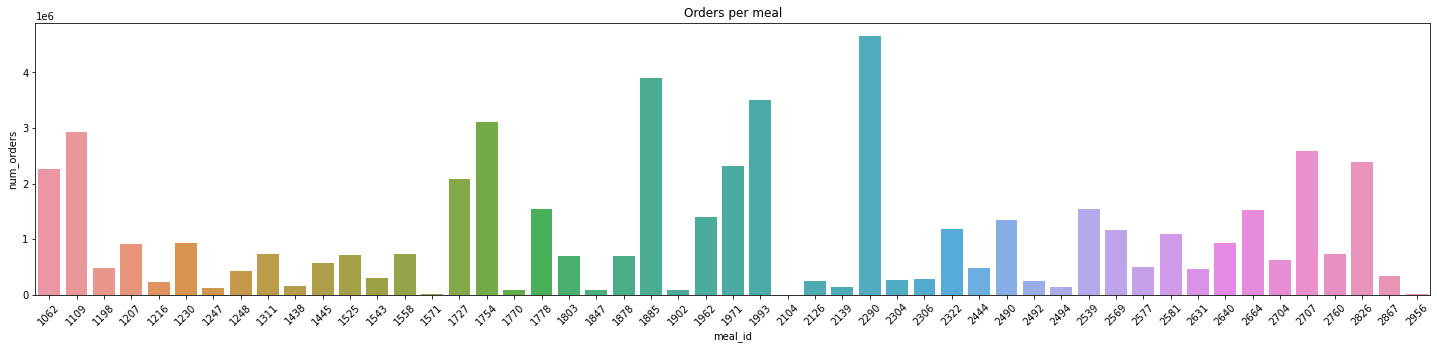

In [26]:
plt.figure(figsize=(25,5))
sns.barplot(x=meal.index, y=meal['num_orders'])
plt.xticks(rotation='45')
plt.title('Orders per meal')
plt.show()

In [27]:
# Which meal are our customers checking out more on average?
meal_checkout_price = merge1.groupby(['meal_id'])[['checkout_price']].mean()
meal_checkout_price

,checkout_price
meal_id,
1062,170.710494
1109,259.517031
1198,175.606796
1207,348.201750
1216,404.073787
1230,347.128715
1247,452.475565
1248,156.077520
1311,168.343983


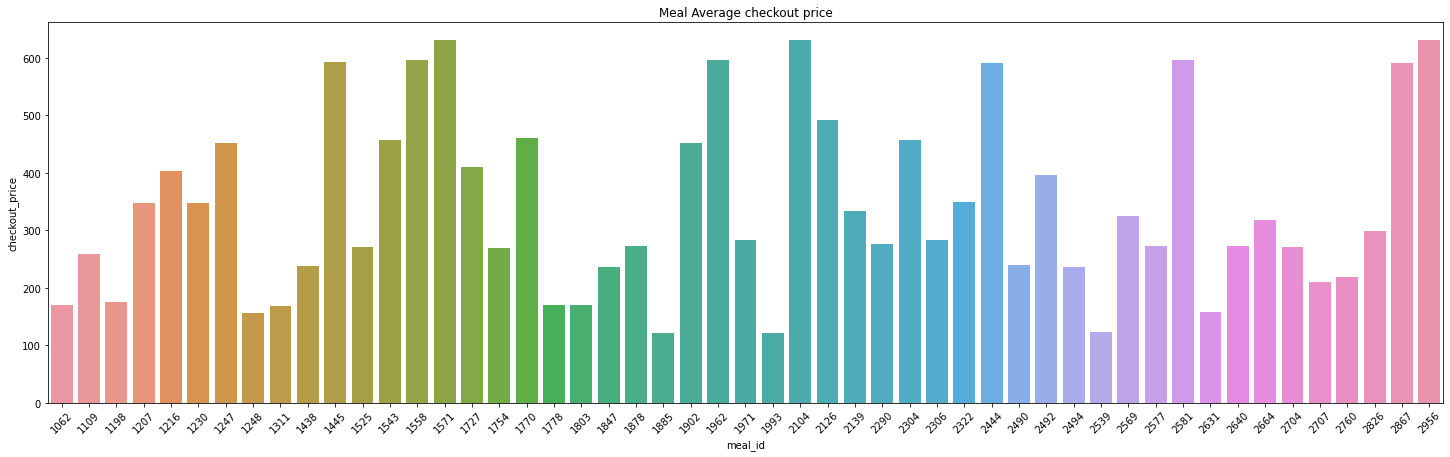

In [28]:
plt.figure(figsize=(25,7))
sns.barplot(x=meal_checkout_price.index, y=meal_checkout_price['checkout_price'])
plt.xticks(rotation='45')
plt.title('Meal Average checkout price')
plt.show()

Ignored the plot for above

In [29]:
# Which city is buying more orders?
city = merge1.groupby(['city_code'])[['num_orders']].sum()#.ascending()
city

,num_orders
city_code,
456,897529.0
461,542855.0
473,541588.0
478,296679.0
485,679963.0
515,403851.0
517,1495163.0
522,1501986.0
526,4283442.0


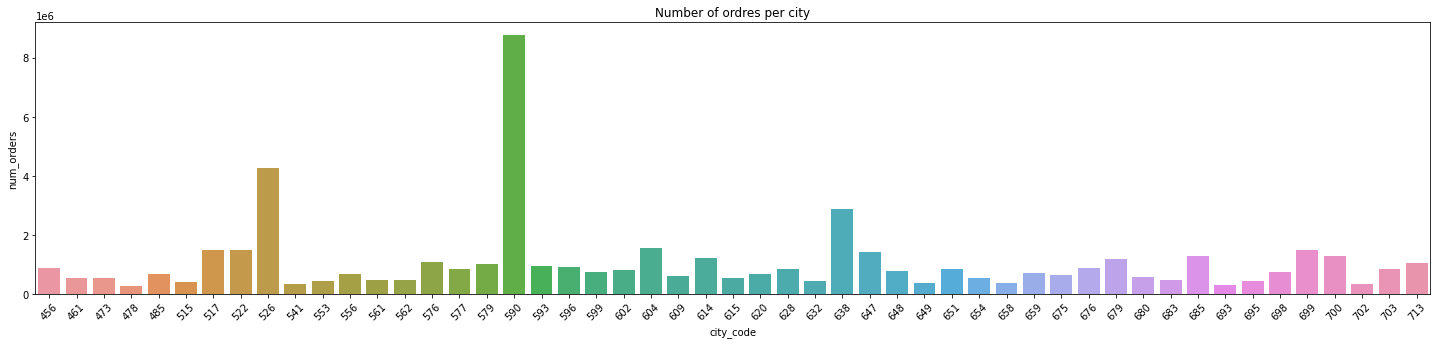

In [30]:
# Let's plot the orders per city
plt.figure(figsize=(25,5))
sns.barplot(x=city.index, y=city['num_orders'])
plt.xticks(rotation='45')
plt.title('Number of ordres per city')
plt.show()

Bivariate analysis 

How many orders do we get in every category?

In [31]:
# Which category had the highest orders

# Let's examine how many orders per individual category using pivot table
Orders = pd.pivot_table(data=merge1, index='category', values='num_orders', aggfunc=np.sum)
Orders

,num_orders
category,
Beverages,19355680.0
Biryani,291494.0
Desert,816708.0
Extras,1924354.0
Fish,20003.0
Other Snacks,2073472.0
Pasta,761755.0
Pizza,3214135.0
Rice Bowl,9666352.0


From the pivote-table we can see that Bevarages, Rice Bowl, salad sandwich Extras have most orders.

This means customers are buying most of these. 

In [32]:
# Which category has most orders?
import plotly.express as px
data = merge1.groupby("category")[["num_orders"]].sum().sort_values(by=['num_orders'],ascending=[False]).reset_index()
px.bar(data, x= 'category', y="num_orders",color='category',color_discrete_sequence=px.colors.qualitative.T10)

In [33]:
# Plot of number of orders against individual causine 
import plotly.express as px
data = merge1.groupby("center_type")[["num_orders"]].sum().sort_values(by=['num_orders'],ascending=[False]).reset_index()
px.bar(data, x= 'center_type', y="num_orders",color='center_type',color_discrete_sequence=px.colors.qualitative.T10)

In [34]:
# Plot the centers against number of order

import plotly.express as px
data = merge1.groupby("cuisine")[["num_orders"]].sum().sort_values(by=['num_orders'],ascending=[False]).reset_index()
px.bar(data, x= 'cuisine', y="num_orders",color='cuisine',color_discrete_sequence=px.colors.qualitative.T10)


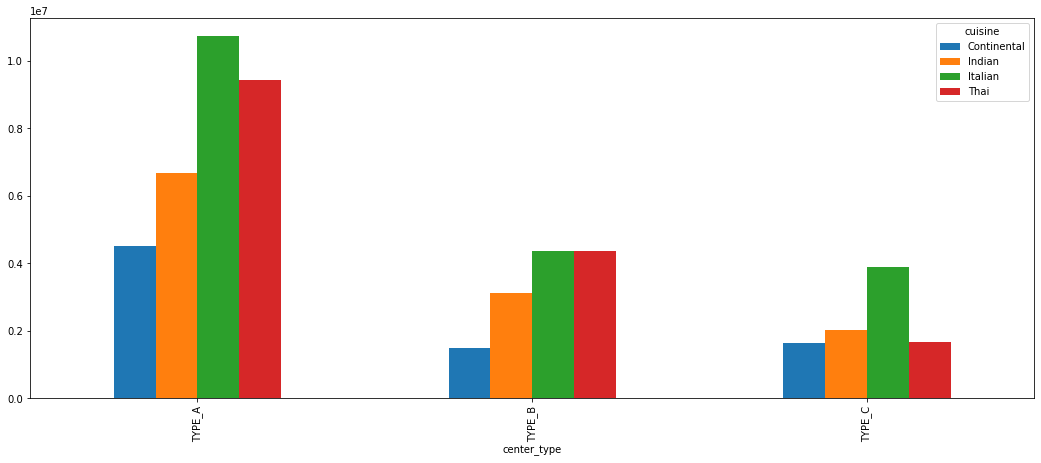

In [35]:
# What's the preference of our cuisine among our customers?
center_pref = merge1.groupby(['center_type','cuisine'])['num_orders'].sum()
center_pref = center_pref.unstack().fillna(0)
center_pref.plot(kind='bar', figsize=(18,7))

From the above we can see center type a buys most of Italian cuisine and least of continel cuisine.

In [36]:
# Change the categorical cols to numericals
#cat_df = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category').cat.codes)
#cat_df.head()

In [37]:
# Let's organize our data in weeks as it gives good view
merge1.sort_values(by='week',inplace=True)
merge1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
15140,1486384,1,13,2139,337.62,437.53,0,0,123.0,590,56,TYPE_B,6.7,Beverages,Indian
133360,1298148,1,102,2444,659.63,659.63,0,0,27.0,593,77,TYPE_A,2.8,Seafood,Continental
133442,1363647,1,132,2444,628.62,627.62,0,0,107.0,522,56,TYPE_A,3.9,Seafood,Continental
133507,1240075,1,23,2444,628.62,627.62,0,0,28.0,698,23,TYPE_A,3.4,Seafood,Continental


As from the output our data goes from week 1 to week 145, next we can convert the weeks in date time, 

In [38]:
merge1 = merge1.groupby('week').sum()
merge1.head()

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,,,,,,,,,,,
1,3645659662,238295,5777913,965809.26,1018365.32,357,414,792261.0,1758466,165591,11921.4
2,3614794872,235795,5734977,938092.43,1005779.20,621,514,787084.0,1743166,164178,11830.2
3,3615848647,237202,5723235,948560.28,1008352.05,104,316,695262.0,1745022,164383,11824.1
4,3613885389,236098,5722512,953833.69,1006446.90,0,292,743529.0,1738944,163637,11809.5
5,3571456643,237587,5661934,901141.58,1001075.16,337,466,1198675.0,1721065,160957,11658.5


In [39]:
# Let's assign a date function.

import datetime
from dateutil.relativedelta import relativedelta
# We assume the year of the dataset was from 2018
year = 2000
def change_week_to_datetime(data):
    return datetime.date(year,1,1)+relativedelta(weeks=+data)

In [40]:
data = merge1['num_orders']
data.index = list(map(change_week_to_datetime, data.index))
data.head()
#https://www.kaggle.com/talha1503/fooddemandpredictionsupervisedml
#https://stackoverflow.com/questions/67374437/overflowerror-date-value-out-of-range-when-converting-matlab-datenum-to-python

2000-01-08     792261.0
2000-01-15     787084.0
2000-01-22     695262.0
2000-01-29     743529.0
2000-02-05    1198675.0
Name: num_orders, dtype: float64

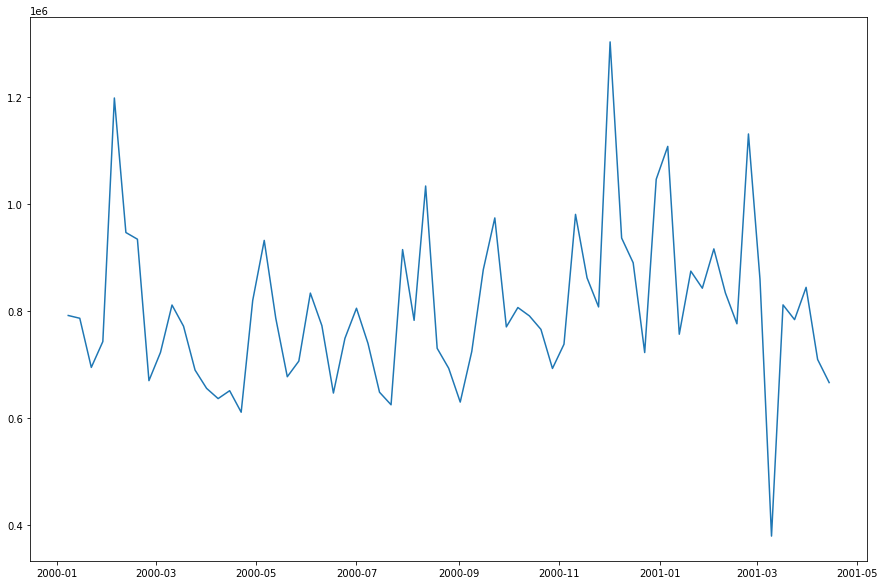

In [41]:
# What is the averange distribution of weekly order?

fig = plt.figure(1,(15,10))
plt.plot(data.index,data.values)
plt.show()

In [42]:
#train_df.head()

In [43]:
#train_df.columns

Checking variable corelation with the target

In [44]:
#Variable Correlations 
var_correlation = merge1.corr()
var_correlation['num_orders']

id                       0.367679
center_id                0.378577
meal_id                  0.336218
checkout_price           0.181324
base_price               0.371724
emailer_for_promotion    0.466431
homepage_featured        0.460076
num_orders               1.000000
city_code                0.375383
region_code              0.360988
op_area                  0.358441
Name: num_orders, dtype: float64

In [45]:
# With this code we'll get only the variables with highest correlation with target variable
cor_target = abs(var_correlation['num_orders'])

# Display features with correlation < 0.2
remove_features = cor_target[cor_target < 0.2]
remove_features

checkout_price    0.181324
Name: num_orders, dtype: float64

In [46]:
# Remove features with correlation < 0.2 because they are not much usefull
#train = merge1.drop(['id', 'week', 'center_id', 'meal_id', 'city_code', 'region_code', 'op_area'], axis=1)

Modelling

In [47]:
X= merge1.drop(['num_orders', 'id', 'center_id', 'meal_id', 'city_code', 'region_code', 'op_area'], axis=1)
y = merge1.num_orders
print(X.shape)
print(y.shape)

(67, 4)
(67,)


In [48]:
# We use the regression analysis  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df = merge1.apply(LabelEncoder().fit_transform)
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:

#X_train, X_test, y_train, y_test = train_test_split(X,y), LEncoder.fit_transform(X_train), scaler.fit_transform(X_train),scaler.fit_transform(X_test),
#scaler.fit_transform(y_train.values.reshape(-1,1)),scaler.fit_transform(y_test.values.reshape(-1,1))

In [50]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
bagging = BaggingRegressor(DecisionTreeRegressor())
bagging.fit(X_train, y_train)
regr.score(X_test,y_test)

0.24209733941313616

Compare the Actual and Predictions 

In [64]:
#Actual and Predictions 
y_predict= regr.predict(X_test)
data['y_predict'] = y_predict
y_predict

array([ 829713.4 ,  916569.07,  771818.  ,  765265.63,  854152.73,
        790121.47,  735924.81,  742145.45,  841709.65,  752710.52,
        844388.58, 1053272.09,  699071.03,  890448.73,  972212.59,
        719675.86, 1064748.24,  808104.51,  744937.14,  736134.08,
        959233.59,  695664.93,  861357.86])

In [65]:
#Printing the actual verse the predicted orders for the next one week
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
print(df)

               Actual   Predicted
2000-09-16   877853.0   829713.40
2000-04-29   820285.0   916569.07
2000-02-05  1198675.0   771818.00
2000-03-11   811825.0   765265.63
2000-11-18   862620.0   854152.73
2000-10-14   791493.0   790121.47
2001-03-10   380065.0   735924.81
2000-02-12   947288.0   742145.45
2001-03-31   844869.0   841709.65
2000-04-01   656102.0   752710.52
2000-07-01   805805.0   844388.58
2001-02-24  1131459.0  1053272.09
2000-07-22   625414.0   699071.03
2000-01-08   792261.0   890448.73
2001-03-17   812075.0   972212.59
2000-09-02   630458.0   719675.86
2000-12-09   936980.0  1064748.24
2000-02-26   670518.0   808104.51
2000-10-21   766289.0   744937.14
2000-08-05   783214.0   736134.08
2001-01-20   875145.0   959233.59
2000-05-20   677834.0   695664.93
2000-11-11   981199.0   861357.86


In [ ]:
#Find sum of the individual sum of actual and Predicted order for the following weeks 


### Making assumption to see if our model will add value to our business to test model PoV

In [ ]:
# If model predicted total sum of 12 orders and each order goes at average price of $50
# we get 12*50=$600

# We calculate the sum of actual orders multipled by price $50

# Find the difference and see the value our model is bringing in to the business 


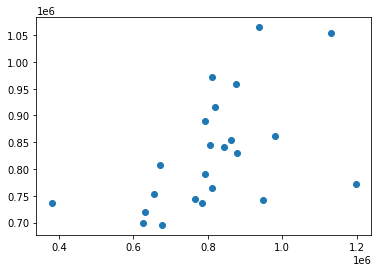

In [71]:
#Plotting
import matplotlib.pyplot as plt
plt.scatter(df['Actual'], df['Predicted'])
plt.show()
# Line chart can help

In [ ]:
# Plot
#plt.plot(X_test)
#plt.plot(predictions, color='red')
#plt.show()

In [ ]:
# Helpful resources 
# https://www.kaggle.com/dimitriosroussis/linear-regression-with-pandas-and-numpy-only
# https://blog.quantinsti.com/steps-data-science/
# https://analyticsindiamag.com/predict-the-food-delivery-time-hackathon-solution/

# https://github.com/aditi310896/Demand-Forecasting
# https://towardsdatascience.com/peek-to-peak-time-series-forecasting-to-predict-demand-for-meal-kits-53c055e77bfd


In [ ]:
#Selecting dataset with where clause in python
#female_df = titanic_df[titanic_df['Sex'] == 'female']
#male_df = titanic_df[titanic_df['Sex'] == 'male']